In [4]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [ ]:
uploaded=files.upload()

In [6]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)
(27455, 28, 28)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


(27455, 28, 28)

In [7]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/15
857/857 [==============================] - 48s 55ms/step - loss: 2.9725 - accuracy: 0.1066 - val_loss: 2.2484 - val_accuracy: 0.2744
Epoch 2/15
857/857 [==============================] - 48s 56ms/step - loss: 2.2389 - accuracy: 0.2978 - val_loss: 1.5672 - val_accuracy: 0.4827
Epoch 3/15
857/857 [==============================] - 47s 55ms/step - loss: 1.8550 - accuracy: 0.4103 - val_loss: 1.2130 - val_accuracy: 0.6021
Epoch 4/15
857/857 [==============================] - 48s 56ms/step - loss: 1.5842 - accuracy: 0.4874 - val_loss: 1.0484 - val_accuracy: 0.6495
Epoch 5/15
857/857 [==============================] - 48s 55ms/step - loss: 1.3942 - accuracy: 0.5444 - val_loss: 0.9361 - val_accuracy: 0.6725
Epoch 6/15
857/857 [==============================] - 48s 55ms/step - loss: 1.2450 - accuracy: 0.5937 - val_loss: 0.8794 - val_accuracy: 0.6840
Epoch 7/15
857/857 [==============================] - 48s 56ms/step - loss: 1.1246 - accuracy: 0.6298 - val_loss: 0.6858 - val_accuracy:

[312.7660827636719, 0.5076687335968018]

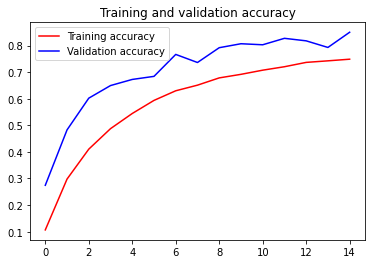

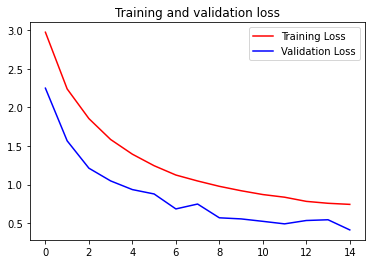

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()